## Liner Regression

In [1]:
# The Normal Equation
# To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words

In [2]:
# Sample data
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
#Now let’s compute θ using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] 
# add x0 = 1 to each instance theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.77569315],
       [2.98643946]])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.77569315]), array([[2.98643946]]))

In [6]:
X_new = np.array([[0], [2]])

In [7]:
lin_reg.predict(X_new)

array([[3.77569315],
       [9.74857207]])

#### Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

### Gradient Descent
The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.



### Batch Gradient Descent


To implement Gradient Descent, you need to compute the gradient of the cost func‐ tion with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative.
Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent.

In [8]:
eta = 0.1 #learning rate
## To find a good learning rate, you can use grid search 
n_iterations = 1000
## A simple solu‐ tion is to set a very large number of iterations but to interrupt the algorithm when the gradient vector 
## becomes tiny—that is, when its norm becomes smaller than a tiny number ε (called the tolerance)—
## because this happens when Gradient Descent has (almost) reached the minimum.
m=100

theta = np.random.randn(2,1) # random initalization

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

# that’s exactly what the Normal Equation found! Gradient Descent worked per‐ fectly.

array([[3.77569315],
       [2.98643946]])

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.7)

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on aver‐ age.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated anneal‐ ing

The function that determines the learning rate at each iteration is called the learning schedule. 

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)

    theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[3.73427942],
       [2.93500816]])

In [12]:
# To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe gressor class

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol= 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.79882926]), array([3.00775606]))

### Mini-batch Gradient Descent

at each step, instead of computing the gradients based on the full train‐ ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini- batch GD computes the gradients on small random sets of instances called mini- batches. 

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐ tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐ ing schedule.

### Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. 

A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

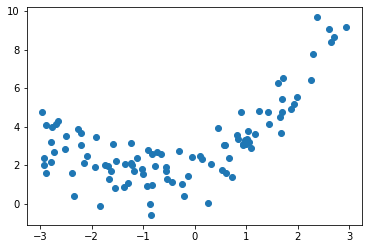

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [16]:
## Clearly, a straight line will never fit this data properly.
## So let’s use Scikit-Learn’s Poly nomialFeatures class

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.85969896])

In [17]:
X_poly[0]

array([-0.85969896,  0.7390823 ])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.947836]), array([[1.01029034, 0.54018983]]))